#### DA 231o Data Engineering at Scale (August 2023)
# Project : Web Server Log Analysis Using Spark

## version: 1

### Change Log
v0.1, 2023-09-06: Creation of the template


##Abstract:  
Web server log analysis can be a potential solution to various problems related to understanding and optimizing web based system and services. Some major problems for which web server analysis can include User Behaviour analysis, performance monitoring, E-commerce optimization, Ad Campaign effectiveness etc. This can also help in server monitoring and taking decision for service scale up/down. Thus, can save from getting startled in case of increased load into server.
The goal of the project is to perform comprehensive analysis of any information which contains data from http /http2 URLs which can be from any sector, e-commerce logs, telecom logs, finance logs etc.

---

## Problem Domain and Dataset

In Web domain of HTTP based server client architecture, most of the system suffers through different kind of attacks. This attacks can be of differente magnitude ranging from service unavailability, command execution, data leaking and malicious response from the server.
One such case we are trying to analyze based on the real world data set available to us. In this project we have tried to manifest the same scenario in telecom domain, where with the progress to 5G architecture this kind of situation is anticipated.

Though there are several techniques in the 5G architecture it self to address this issues, but when deployed at private network level still malicious attacks are common threat for any operator.


##Dataset

We have captured the HTTP based req/response for some of the vital network functions in 5G network. Mostly from different span.
Also we have a dataset which contains the suspicious attacks that have been detected at the as per the behavior of that particular device or channel.
So, with these dataset we will try to analyze the impact on each network function and segregate different kind of attacks. Also we will manifest the behavior of each network function during these attacks.

*** Network function are basically web server.

* **Attacks.csv**: Each row in this file contains details about the connections that were made to the servers. Some of the connection are harmless where as few are detected by the ingress controller as malicious. With this dataset we can analyze the impact on different core network functions.
```
-- ts|uid|id.orig_h|id.orig_p|id.resp_h|id.resp_p|proto|service|duration|orig_bytes|resp_bytes|conn_state|local_orig|local_resp|missed_bytes|history|orig_pkts|orig_ip_bytes|resp_pkts|resp_ip_bytes|tunnel_parents|label|detailed-label: string (nullable = true)
```
More details are  here: [Any external link]


* **server_behavior.csv**: This file contains the HTTP req/res with failure result code from the network functions at several spans. There can be erroneous response from the function based on different cases. But the 500 series of HTTP error code shall be on our focus. It reflects the imapct on the network function out attack like DOS and DDOS.
 ```|-- No : integer (nullable = true) ```

 ```|-- Time: string (nullable = true)```

 ```|-- Source: string (nullable = true)```

 ```|-- Destination: string (nullable = true)```

 ```|-- Source Port : string (nullable = true)```

 ```|-- Destination Port: string (nullable = true)```

 ```|-- Protocol: string (nullable = true)```

 ```|-- Length: integer (nullable = true)```

 ```|-- Status: string (nullable = true)```

 ```|-- Info: string (nullable = true)```


Install Spark/Hadoop and Python dependencies

In [55]:
#######################################
###!@0 START INIT ENVIRONMENT
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
!ls -al /content/drive/Shareddrives/DA231-2023/assignments/spark-3.0.3-bin-hadoop2.7.tgz
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!tar xf /content/drive/Shareddrives/DA231-2023/assignments/spark-3.0.3-bin-hadoop2.7.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.3-bin-hadoop2.7"
###!@0 END INIT ENVIRONMENT

Mounted at /content/drive
-r-------- 1 root root 220400553 Sep  4 09:38 /content/drive/Shareddrives/DA231-2023/assignments/spark-3.0.3-bin-hadoop2.7.tgz


 Standard initialization for the Spark session.

In [56]:
#######################################
###!@1 START OF PYSPARK INIT
import findspark
findspark.init()
findspark.find()
from pyspark.sql import SparkSession
input_type = 'sample'
spark = SparkSession.builder\
         .master("local")\
         .appName("MyApp")\
         .config('spark.ui.port', '4050')\
         .getOrCreate()
spark
# Spark is ready to go within Colab!
###!@1 END OF PYSPARK INIT

### Initialize all the variables

In [57]:

#######################################
###!@2 START OF DEFINING INPUT FILES
basepath = "/content/drive/MyDrive/content/"
Attack_dataset = basepath + "Attack_details1.csv"
Server_status_dataset = basepath + "server_status.csv"
Maintenance_dataset = basepath + "maintanence_schedule.csv"

df_StatusData = spark.read.csv(Server_status_dataset, header=True, inferSchema=True)
df_AttackData = spark.read.csv(Attack_dataset, header=True, inferSchema=True)
df_MaintaData = spark.read.csv(Maintenance_dataset, header=True, inferSchema=True)
###!@3 END OF LOADING DATA

### Common Imports


In [58]:
#######################################
###!@5 START COMMON USER IMPORTS
#######################################
## Specify valid imports, if any, common to ALL your answers  ==========
## start your edits here =================
import math
import time
from datetime import datetime
from pyspark.sql.types import StructType, StructField, StringType, DoubleType, IntegerType
from pyspark.sql.functions import *
from matplotlib import pyplot as plt
import plotly.express as px
import numpy as np

## end your edits here ==============

### Utility APIs

In [59]:
#######################################
###!@6 START COMMON USER FUNCTIONS
#######################################
## Specify user defined functions, if any, common to ALL your answers   =====
## start your edits here =================


def get_labels(AttackCleanedDF):
  return AttackCleanedDF.select("label").distinct().rdd.flatMap(lambda x: x).collect()






## end your edits here =================
###!@6 END COMMON USER FUNCTIONS

### ---
### **1) Data Parsing and Cleaning (DATA Munging)**

***Context:*** *Data Science in the wild requires data preparation and cleaning before you can perform exploratory analysis on them. This can include parsing, removing invalid fields, extrapolation, etc. Let's try a flavor of it here.*

### **Below is the output for raw data structure from dataset.**
## **Attach.CSV**
 ```
 |-- timestamp: string (nullable = true)
 |-- id_orig_h: string (nullable = true)
 |-- id_orig_p: string (nullable = true)
 |-- id_resp_h: string (nullable = true)
 |-- id_resp_p: string (nullable = true)
 |-- proto: string (nullable = true)
 |-- detailed-label: string (nullable = true)
 ```

### **Server_behavior.csv**
 ```
|-- No : integer (nullable = true)
# |-- Time: string (nullable = true)

*   List item
*   List item


|-- Source: string (nullable = true)
|-- Destination: string (nullable = true)
|-- Source Port : string (nullable = true)
|-- Destination Port: string (nullable = true)
|-- Protocol: string (nullable = true)
|-- Length: integer (nullable = true)
|-- Status: string (nullable = true)
|-- Info: string (nullable = true)
```

We need to perform DATA munging activity to clean and formalize the data for further data processing. So below code shall perform DATA munging activity.
Activity:
    1. Convert Attack.csv into csv.
    2. Remove any entries with empty source and destination IP port
    3. Convert the timestamp from UNIX format to readable format.
    4. Convert the column name to same format. Remove "." from column name.

In [60]:
#######################################
###convert Attack dataset to csv format
data = spark.read.text(Attack_dataset)
header = data.first().value.split("|")
schema = StructType([StructField(name, StringType(), True) for name in header])

# Skip the first line (header) and split the remaining lines
lines =  data.rdd.zipWithIndex().map(lambda x: x[0].value.split("|")).filter(lambda row: len(row) == len(header))
# Create a DataFrame from the cleaned data and schema
df = spark.createDataFrame(lines, schema=schema)
print(df.count())

##convert the  ts fields from unix timestamp to readable format.
df = df.withColumn("timestamp", from_unixtime("ts"))
df = df.drop("ts")

##remove "." from the coulmn names
new_column_names = []
for column_name in df.columns:
    new_column_name = column_name.replace(".", "_")
    new_column_names.append(new_column_name)

#Rename the columns
for i, old_name in enumerate(df.columns):
    df = df.withColumnRenamed(old_name, new_column_names[i])

# Reorder the columns to have "timestamp" at the beginning
column_order = ["timestamp"] + [col_name for col_name in df.columns if col_name != "timestamp"]
df =df.select(column_order)

###Select the relevant column for our operation
AttackCleanedDF = df.select("timestamp", "id_orig_h", "id_orig_p", "id_resp_h", "id_resp_p", 'proto', 'duration', 'label')
#AttackCleanedDF.show()
#AttackCleanedDF.printSchema()

## No cleaning is required for Server_Details and Maintenance_schedule dataset

## end your edits here =================

190001


### **2) Removal of BENIGN only sources from the data set**
a). Check if there is any source which later on turned into an attacker.

b). Remove sources with no attack from the dataset. Keep source with both (BENIGN and MALICIOUS) or only MALICIOUS role.



In [61]:
#AttackCleanedDF.persist()
#AttackSampleDF = AttackCleanedDF.sample(False, 1.0)
#AttackCleanedDF.show(10)#select('id_orig_h').distinct().show(10)
#StatusSample = df_StatusData.sample(False, 0.1)
#df_StatusData.persist()
#AttackCleanedDF.show()
#df_StatusData.show()


##In this section we will see three types of sources
1. Pure Benign Source
2. Pure Malicious Source
3. Mixed Source



In [62]:
def getBenignSources(AttackCleanedDF):
  BenignSources = AttackCleanedDF.filter(AttackCleanedDF["label"].startswith('B')).select("id_orig_h").distinct()
  return BenignSources
def getMaliciousSources(AttackCleanedDF):
  MaliciousSources = AttackCleanedDF.filter(AttackCleanedDF["label"].startswith('M')).select("id_orig_h").distinct()
  return MaliciousSources
def getMixedSources(BenignSources, MaliciousSources):
  BenignMaliciousSources = BenignSources.join(MaliciousSources,BenignSources.id_orig_h ==  MaliciousSources.id_orig_h,"inner")\
                                        .drop(MaliciousSources.id_orig_h)\
                                        .groupBy("id_orig_h").count().select("id_orig_h")
  return BenignMaliciousSources
def plotAllSourceType(data,valueCol,nameCol,title='Title'):
  fig = px.pie(data.toPandas().to_dict(), values=valueCol, names=nameCol, title=title)
  fig.show()
  #pio.write_image(fig, "figname.png")
  #fig.save()


BenignSources = getBenignSources(AttackCleanedDF)
MaliciousSources = getMaliciousSources(AttackCleanedDF)
MixedSources = getMixedSources(BenignSources, MaliciousSources)
PureBenignSources = BenignSources.subtract(MixedSources).withColumn("type", lit("Pure Benign"))
PureMaliciousSources = MaliciousSources.subtract(MixedSources).withColumn("type", lit("Pure Malicious"))
MixedTypeSources = MixedSources.withColumn("type", lit("Mixed"))

#MixedTypeSources.show()
#PureMaliciousSources.show()
#MixedTypeSources.show()

UserTypeDf = MixedTypeSources.union(PureMaliciousSources).union(PureBenignSources)
UserTypeDf.show()

UserTypeCntDf = UserTypeDf.groupBy('type').count()
UserTypeCntDf.show()

plotAllSourceType(UserTypeCntDf,'count','type','Type Of Users')

+---------------+--------------+
|      id_orig_h|          type|
+---------------+--------------+
|  148.7.119.186|         Mixed|
|     45.45.97.1|         Mixed|
|   96.230.88.85|         Mixed|
| 227.250.86.193|         Mixed|
| 219.201.229.10|         Mixed|
| 230.94.179.188|         Mixed|
| 218.35.211.232|         Mixed|
|    196.42.8.41|         Mixed|
|222.137.115.221|         Mixed|
|   87.84.12.190|         Mixed|
| 100.58.123.114|         Mixed|
|  251.254.61.13|         Mixed|
|   12.153.68.15|Pure Malicious|
| 116.38.152.250|Pure Malicious|
|  202.168.82.44|Pure Malicious|
|  163.188.41.56|Pure Malicious|
| 186.176.198.91|Pure Malicious|
|191.239.186.214|Pure Malicious|
|197.143.150.124|Pure Malicious|
|  55.195.151.17|Pure Malicious|
+---------------+--------------+
only showing top 20 rows

+--------------+-----+
|          type|count|
+--------------+-----+
|Pure Malicious|   15|
|         Mixed|   12|
|   Pure Benign|29061|
+--------------+-----+



+------+----+-----+
|typeMB|hour|count|
+------+----+-----+
|     B|   8|  238|
|     B|  23| 2047|
|     B|  13|  225|
|     B|  19| 3254|
|     B|   5|  232|
|     M|  18| 2552|
|     M|  10|  152|
|     M|  15|  165|
|     B|   0|  261|
|     M|  12|  136|
|     M|  13|  162|
|     B|   7|  226|
|     M|  22| 6372|
|     B|  21| 2609|
|     B|  18| 1412|
|     M|   8|  164|
|     M|  11|  139|
|     B|  20| 2172|
|     M|   5|  166|
|     B|  10|  248|
+------+----+-----+
only showing top 20 rows

+------+----+-----+
|typeMB|hour|count|
+------+----+-----+
|     B|   8| 1151|
|     B|  23|10840|
|     B|  13| 1222|
|     B|  19|17105|
|     B|   5| 1139|
|     B|   0| 1322|
|     B|   7| 1164|
|     B|  21|14061|
|     B|  18| 7572|
|     B|  20|10892|
|     B|  10| 1188|
|     B|   6| 1195|
|     B|  22|17230|
|     B|   9| 1217|
|     B|  16| 1244|
|     B|   1| 1303|
|     B|   3| 1335|
|     B|   4| 1289|
|     B|  12| 1200|
|     B|  15| 1304|
+------+----+-----+
only showing t

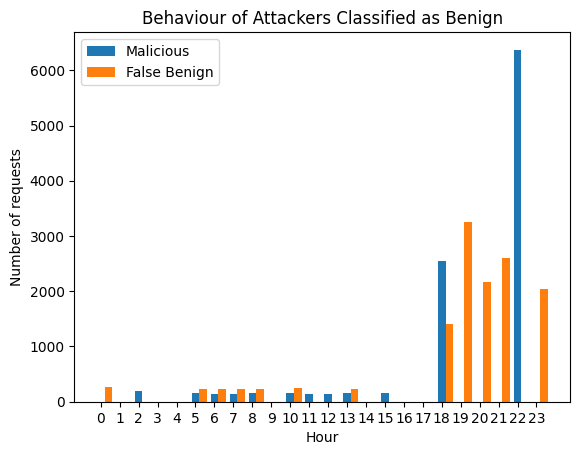

In [63]:
def plotMixedDFwithTime(MixedCleanedDF,BCleanedDF):
  #plot for 24 hour buckets
  d = MixedCleanedDF.toPandas().to_dict()
  b = BCleanedDF.toPandas().to_dict()

  hours = np.arange(24)
  benign = [int(0) for _ in range(24)]
  malicious = [int(0) for _ in range(24)]
  pb = [int(0) for _ in range(24)]
  width = 0.4
  for i in range(24):
    if i in d['count'].keys():
      count = d['count'][i]
      category = d['typeMB'][i]
      hour = d['hour'][i]
      if category == 'M':
        malicious[hour] += count
      else:
        benign[hour] += count
  for i in range(24):
    if i in b['count'].keys():
      count = b['count'][i]
      category = b['typeMB'][i]
      hour = b['hour'][i]
      if category == 'B':
        pb[hour] += count
  plt.bar(hours, malicious, width, label="Malicious")
  plt.bar(hours+width, benign, width, label="False Benign")
  #plt.bar(hours+2*width, pb, width, label="True Users")
  plt.title("Behaviour of Attackers Classified as Benign")
  plt.xticks(hours)
  plt.xlabel("Hour")
  plt.ylabel("Number of requests")
  plt.legend()
  plt.show()

#Create MaliciousDF and MixedDF
OnlyMixedTypeDF = UserTypeDf.filter(UserTypeDf["type"] == "Mixed")
MixedDF = AttackCleanedDF.join(OnlyMixedTypeDF,AttackCleanedDF.id_orig_h == OnlyMixedTypeDF.id_orig_h,"inner").drop(OnlyMixedTypeDF.id_orig_h)
#MixedDF.show()

#append hour column
MixedDFWithTime = MixedDF.withColumn("hour", hour(MixedDF.timestamp)).withColumn("typeMB",substring(MixedDF.label,0,1))
#MixedDFWithTime.show()

MixedCleanedDF = MixedDFWithTime.select("id_orig_h","typeMB","hour").groupBy("typeMB","hour").count()
MixedCleanedDF.show()

#Create MaliciousDF and MixedDF
OnlyBenignTypeDF = UserTypeDf.filter(UserTypeDf["type"] == "Pure Benign")
BDF = AttackCleanedDF.join(OnlyBenignTypeDF,AttackCleanedDF.id_orig_h == OnlyBenignTypeDF.id_orig_h,"inner").drop(OnlyBenignTypeDF.id_orig_h)
#MixedDF.show()

#append hour column
BDFWithTime = BDF.withColumn("hour", hour(BDF.timestamp)).withColumn("typeMB",substring(BDF.label,0,1))
#MixedDFWithTime.show()

BCleanedDF = BDFWithTime.select("id_orig_h","typeMB","hour").groupBy("typeMB","hour").count()
BCleanedDF.show()

plotMixedDFwithTime(MixedCleanedDF,BCleanedDF)

### **3) Identify all categories of attack from dataset.**

   a) Create pie chart to depict the categorization and percentage of these attcak.( number of occurrance)

   B) Create pie chart to depict the categorization and percentage of these attcak.(Duration)

   c) Create pie chart to depict the categorization and percentage of these attcak.(Bandwidth no of packets)


### Types of Attacks in our systems.
1. Malicious   PartOfAHorizontalPortScan
2. Malicious   C&C
3. Malicious   DDoS
4. Malicious

In [64]:
groupedMaliciousDF = AttackCleanedDF.filter(AttackCleanedDF.label.contains("Malicious")).groupBy("label").count()
groupedMaliciousDF.show()

plotAllSourceType(groupedMaliciousDF,'count','label','Types Of Attack')


+--------------------+-----+
|               label|count|
+--------------------+-----+
|           Malicious|29965|
|Malicious   PartO...| 2363|
|     Malicious   C&C| 4443|
|    Malicious   DDoS|33873|
+--------------------+-----+



**Conclusion**
- Most of the attacks are DDoS

## **Category wise Average Duration of Attacks**

In [65]:
groupedMaliciousDurationDF = AttackCleanedDF.filter(AttackCleanedDF.label.contains("Malicious"))\
                                            .filter(~AttackCleanedDF.duration.contains("-"))\
                                            .groupBy("label").agg(avg("duration").alias("avg_duration"))
#groupedMaliciousDurationDF.show()

plotAllSourceType(groupedMaliciousDurationDF,'avg_duration','label','Average Duration of Attacks')



### **4. Analyze the server behavior during the time of attack.**

   a) Categorize diferent kind of servers from the logs.

   b) Create pie chart to depict the impact caused by different types of attack on these servers.

   c) Which server was mostly impacted because of these attack?

   D) Analyze the type of imapct casued in these servers using HTTP return code.

   E) capture the behavior in Pie chart or similar diagram.


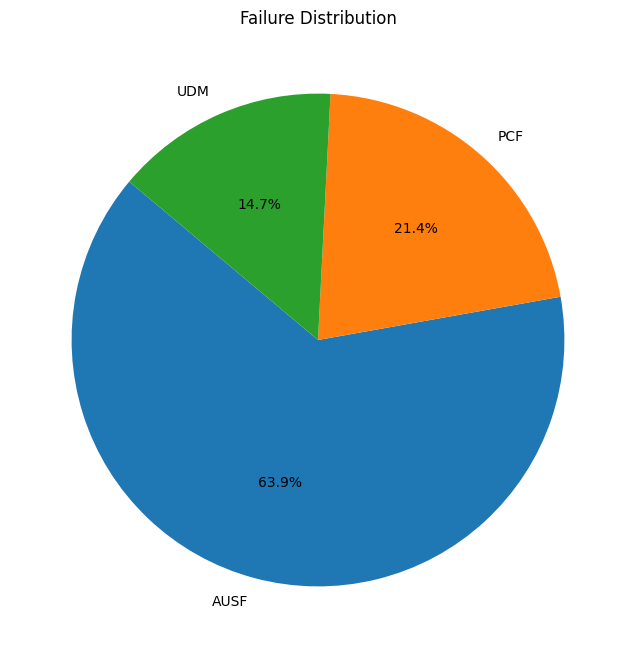

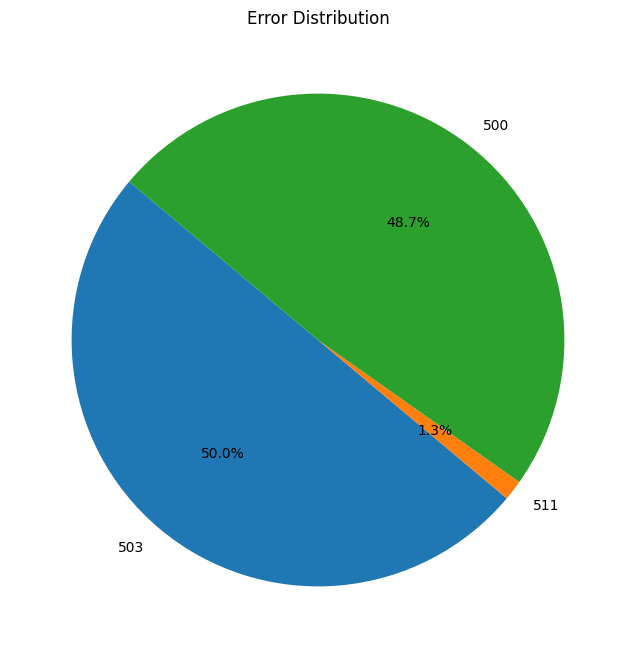

In [66]:
#df_StatusData.show()
df_copy = df_StatusData.alias("df_copy")

def categorize_info(info):
    return when(info.contains('nausf-auth'), 'AUSF') \
           .when(info.contains('nudm-sdm'), 'UDM') \
           .when(info.contains('npcf-smpolicy'), 'PCF') \
           .otherwise('Responses')

# Apply the categorize_info function to create a new 'Category' column
df_copy = df_copy.withColumn('server_type', categorize_info(col('Info')))
# Count the occurrences for each category
category_counts = df_copy.groupBy('server_type').agg(count('*').alias('Count'))

# Filter out rows with 'Other' category
category_counts = category_counts.filter(col('server_type').isin('AUSF', 'UDM', 'PCF'))
# Show the resulting counts
#category_counts.show()

#df_copy.show(truncate=False)

#create a pie chart
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col


def draw_pie_chart(pd_df, column_name, title):
    pd_df = category_counts.toPandas()
    plt.figure(figsize=(8, 8))
    plt.pie(pd_df['Count'], labels=pd_df[column_name], autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

draw_pie_chart(category_counts, 'server_type', 'Failure Distribution')




df_copy = df_StatusData.alias("df_copy")

def categorize_info(info):
    return when(info.contains('500'), '500') \
           .when(info.contains('501'), '501') \
           .when(info.contains('502'), '502') \
           .when(info.contains('503'), '503') \
           .when(info.contains('511'), '511') \
           .when(info.contains('5'), 'HTTP ERROR') \
           .otherwise('Request')

# Apply the categorize_info function to create a new 'Category' column
df_copy = df_copy.withColumn('error_type', categorize_info(col('Info')))
# Count the occurrences for each category
category_counts = df_copy.groupBy('error_type').agg(count('*').alias('Count'))


# Filter out rows with 'Other' category
category_counts = category_counts.filter(col('error_type') != 'Request')
draw_pie_chart(category_counts, 'error_type', 'Error Distribution')

In [67]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer
# Create a feature vector

OnlyMTypeDF = UserTypeDf.filter(UserTypeDf["type"] == "Pure Malicious")
MDF = AttackCleanedDF.join(OnlyMTypeDF,AttackCleanedDF.id_orig_h == OnlyMTypeDF.id_orig_h,"inner").drop(OnlyMTypeDF.id_orig_h)

categorical_columns = ["id_orig_h", "id_orig_p", "id_resp_h", "id_resp_p","proto"]
# Create StringIndexer instances for each column
string_indexers = StringIndexer(inputCol="id_orig_p", outputCol="id_orig_p_num")
indexed_df = string_indexers.fit(MDF).transform(MDF)
indexed_df = indexed_df.drop("id_orig_p")


string_indexers = StringIndexer(inputCol="id_orig_h", outputCol="id_orig_h_num")
indexed_df = string_indexers.fit(indexed_df).transform(indexed_df)
indexed_df = indexed_df.drop("id_orig_h")

string_indexers = StringIndexer(inputCol="id_resp_h", outputCol="id_resp_h_num")
indexed_df = string_indexers.fit(indexed_df).transform(indexed_df)
indexed_df = indexed_df.drop("id_resp_h")

string_indexers = StringIndexer(inputCol="id_resp_p", outputCol="id_resp_p_num")
indexed_df = string_indexers.fit(indexed_df).transform(indexed_df)
indexed_df = indexed_df.drop("id_resp_p")

string_indexers = StringIndexer(inputCol="proto", outputCol="proto_num")
indexed_df = string_indexers.fit(indexed_df).transform(indexed_df)
indexed_df = indexed_df.drop("proto")

string_indexers = StringIndexer(inputCol="label", outputCol="label_num")
indexed_df = string_indexers.fit(indexed_df).transform(indexed_df)
indexed_df = indexed_df.drop("label")

# Show the result
indexed_df.show()

+-------------------+--------+--------------+-------------+-------------+-------------+-------------+---------+---------+
|          timestamp|duration|          type|id_orig_p_num|id_orig_h_num|id_resp_h_num|id_resp_p_num|proto_num|label_num|
+-------------------+--------+--------------+-------------+-------------+-------------+-------------+---------+---------+
|2023-11-29 00:52:17|    3.03|Pure Malicious|          1.0|         13.0|          3.0|          2.0|      0.0|      0.0|
|2023-12-01 07:24:47|    6.15|Pure Malicious|          1.0|         13.0|          3.0|          3.0|      1.0|      0.0|
|2023-11-30 18:08:54|    4.06|Pure Malicious|          2.0|         13.0|          4.0|          3.0|      0.0|      1.0|
|2023-12-02 09:55:24|    6.36|Pure Malicious|          2.0|         13.0|          2.0|          3.0|      1.0|      0.0|
|2023-12-04 19:08:11|    3.29|Pure Malicious|          2.0|         13.0|          3.0|          3.0|      1.0|      1.0|
|2023-12-06 02:02:24|   

In [68]:
indexed_df.show()
indexed_df.printSchema()
indexed_df = indexed_df.filter(indexed_df.duration != 'duration')
indexed_df.select('id_orig_p_num').show()

+-------------------+--------+--------------+-------------+-------------+-------------+-------------+---------+---------+
|          timestamp|duration|          type|id_orig_p_num|id_orig_h_num|id_resp_h_num|id_resp_p_num|proto_num|label_num|
+-------------------+--------+--------------+-------------+-------------+-------------+-------------+---------+---------+
|2023-11-29 00:52:17|    3.03|Pure Malicious|          1.0|         13.0|          3.0|          2.0|      0.0|      0.0|
|2023-12-01 07:24:47|    6.15|Pure Malicious|          1.0|         13.0|          3.0|          3.0|      1.0|      0.0|
|2023-11-30 18:08:54|    4.06|Pure Malicious|          2.0|         13.0|          4.0|          3.0|      0.0|      1.0|
|2023-12-02 09:55:24|    6.36|Pure Malicious|          2.0|         13.0|          2.0|          3.0|      1.0|      0.0|
|2023-12-04 19:08:11|    3.29|Pure Malicious|          2.0|         13.0|          3.0|          3.0|      1.0|      1.0|
|2023-12-06 02:02:24|   

In [69]:
indexed_df.select('id_orig_p_num').distinct().show()
indexed_df.select('id_orig_h_num').distinct().show()
indexed_df.select('id_resp_p_num').distinct().show()
indexed_df.select('id_resp_p_num').distinct().show()
indexed_df.select('proto_num').distinct().show()

+-------------+
|id_orig_p_num|
+-------------+
|          0.0|
|          1.0|
|          4.0|
|          3.0|
|          2.0|
+-------------+

+-------------+
|id_orig_h_num|
+-------------+
|          8.0|
|          0.0|
|          7.0|
|          1.0|
|          4.0|
|         11.0|
|         14.0|
|          3.0|
|          2.0|
|         10.0|
|         13.0|
|          6.0|
|          5.0|
|          9.0|
|         12.0|
+-------------+

+-------------+
|id_resp_p_num|
+-------------+
|          0.0|
|          1.0|
|          3.0|
|          2.0|
+-------------+

+-------------+
|id_resp_p_num|
+-------------+
|          0.0|
|          1.0|
|          3.0|
|          2.0|
+-------------+

+---------+
|proto_num|
+---------+
|      0.0|
|      1.0|
+---------+



In [70]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import col
from pyspark.ml.linalg import DenseVector, SparseVector, Vectors, VectorUDT
from pyspark.sql import functions as F
from pyspark.sql.types import *




# Create a feature vector
feature_cols = ["id_orig_h_num", "id_orig_p_num", "id_resp_h_num", "id_resp_p_num", 'proto_num']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
indexed_df1 = assembler.transform(indexed_df)


toDense = lambda v: Vectors.dense(v.toArray())
toDenseUdf = F.udf(toDense, VectorUDT())
indexed_df1 = indexed_df1.withColumn('features', toDenseUdf('features'))
indexed_df1.select('features').show()

# Split the data into training and test sets (80% training, 20% testing)
(training_data, test_data) = indexed_df1.randomSplit([0.7, 0.3], seed=123)

training_data.printSchema()

# Initialize the Random Forest classifier
rf = RandomForestClassifier(labelCol="label_num", featuresCol="features", numTrees=10)

# Create a pipeline
pipeline = Pipeline(stages=[rf])

# Train the model
model = pipeline.fit(training_data)
# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="label_num", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

+--------------------+
|            features|
+--------------------+
|[13.0,1.0,3.0,2.0...|
|[13.0,1.0,3.0,3.0...|
|[13.0,2.0,4.0,3.0...|
|[13.0,2.0,2.0,3.0...|
|[13.0,2.0,3.0,3.0...|
|[13.0,2.0,2.0,2.0...|
|[13.0,4.0,1.0,2.0...|
|[13.0,0.0,0.0,2.0...|
|[13.0,1.0,1.0,0.0...|
|[13.0,4.0,3.0,2.0...|
|[13.0,1.0,1.0,3.0...|
|[13.0,4.0,0.0,3.0...|
|[13.0,1.0,4.0,0.0...|
|[13.0,2.0,1.0,0.0...|
|[13.0,1.0,1.0,1.0...|
|[13.0,1.0,4.0,3.0...|
|[13.0,2.0,2.0,3.0...|
|[13.0,2.0,4.0,1.0...|
|[13.0,2.0,4.0,1.0...|
|[13.0,0.0,0.0,2.0...|
+--------------------+
only showing top 20 rows

root
 |-- timestamp: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- type: string (nullable = false)
 |-- id_orig_p_num: double (nullable = false)
 |-- id_orig_h_num: double (nullable = false)
 |-- id_resp_h_num: double (nullable = false)
 |-- id_resp_p_num: double (nullable = false)
 |-- proto_num: double (nullable = false)
 |-- label_num: double (nullable = false)
 |-- features: vector (nullable